## Name : Syed Muhammad Ahmed Zaidi
## Kaggle Name : Ahmed Zaidi
## Student ID : 20972008
## Unit : Explainable Approaches to Machine Learning (Project)

# **LIBRARIES USED**


In [1]:

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import files


from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

!pip install catboost
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.9 MB/s eta 0:00:00


# **DATA PREPROCESSING**

## **DATA LOADING**

**Loading Data to Google Colab**

In [2]:
# Function to load data from Google Drive
def load_data_from_drive(file_id):
    url = f'https://drive.google.com/uc?id={file_id}'
    return pd.read_csv(url)

# File IDs extracted from Google Drive links(so there is no need to upload them)
train_file_id = '1Ec3S3VsbmFda6ah5iIla3UhHw_VuOIXx'
test_file_id = '1pzwejy1JJXWJulWhv-AHVdqlJ1qnz304'

# Load the training and testing data
train_data = load_data_from_drive(train_file_id)
test_data = load_data_from_drive(test_file_id)

## **UNDERSTANDING DATA**

In [3]:
# Display the first few rows of the training data
print("Training Data Head:")
display(train_data.head())

# Display the first few rows of the testing data
print("Testing Data Head:")
display(test_data.head())

Training Data Head:


,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,Superheated,37.9,-1,152.0,18,2,12.15,7.90,10.7,0.199929
1,3204,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,Superheated,37.9,-1,152.0,19,3,12.50,-2.95,-1.9,0.435681
2,3205,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,Superheated,37.9,-1,152.0,20,3,12.50,-2.95,4.4,0.264031
3,3206,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,Superheated,37.9,-1,152.0,21,3,12.50,-2.95,10.7,0.270576
4,3207,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,Superheated,37.9,-1,152.0,22,4,12.50,-2.70,11.0,0.204675


Testing Data Head:


,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,1,1,12.05,-5.6,-1.0
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,2,1,12.05,-5.6,1.3
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,3,1,12.05,-5.6,3.6
3,3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,4,1,12.05,0.2,-1.0
4,4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,5,1,12.05,0.2,1.3


In [4]:
# Training data information
print("Training Data Info:")
train_data.info()

# Testing data information
print("Testing Data Info:")
test_data.info()

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   Tank Failure Pressure (bar)      10000 non-null  float64
 2   Liquid Ratio (%)                 10000 non-null  float64
 3   Tank Width (m)                   10000 non-null  float64
 4   Tank Length (m)                  10000 non-null  float64
 5   Tank Height (m)                  10000 non-null  float64
 6   BLEVE Height (m)                 10000 non-null  float64
 7   Vapour Height (m)                10000 non-null  float64
 8   Vapour Temperature (K)           10000 non-null  float64
 9   Liquid Temperature (K)           10000 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10000 non-null  int64  
 11  Obstacle Width (m)               10000 non-null  int64  
 12 

In [5]:
#Training Data Descriptive Statistics
print(train_data.describe())

#Testing Data Descriptive Statistics
print(test_data.describe())

                ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  \
count  10000.00000                 10000.000000      10000.000000   
mean    8202.50000                    22.951900          0.504058   
std     2886.89568                    10.547951          0.228211   
min     3203.00000                     5.100000          0.101212   
25%     5702.75000                    13.700000          0.298696   
50%     8202.50000                    22.600000          0.507989   
75%    10702.25000                    32.100000          0.703826   
max    13202.00000                    42.000000          0.899184   

       Tank Width (m)  Tank Length (m)  Tank Height (m)  BLEVE Height (m)  \
count    10000.000000     10000.000000     10000.000000      10000.000000   
mean         1.696920         5.597640         1.673380          1.024020   
std          0.764911         2.597797         0.751486          0.575427   
min          0.400000         0.600000         0.400000          0.000

## **DATA CLEANING**

**FINDING TREATING MISSING VALUES**

In [6]:
#To find missing values in each column of training data
print(train_data.isnull().sum())

ID                                 0
Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64


**FINDING AND TREATING DUPLICATE VALUES**

In [7]:
# Finding duplicates within the training data
duplicate_rows_train = train_data.duplicated().sum()
duplicate_rows_train

0

**CONVERTING CATEGORICAL VARIABLES TO NUMERICAL**

In [8]:
#Training Data Types
print(train_data.dtypes)

#Testing Data Types
print(test_data.dtypes)

ID                                   int64
Tank Failure Pressure (bar)        float64
Liquid Ratio (%)                   float64
Tank Width (m)                     float64
Tank Length (m)                    float64
Tank Height (m)                    float64
BLEVE Height (m)                   float64
Vapour Height (m)                  float64
Vapour Temperature (K)             float64
Liquid Temperature (K)             float64
Obstacle Distance to BLEVE (m)       int64
Obstacle Width (m)                   int64
Obstacle Height (m)                  int64
Obstacle Thickness (m)             float64
Obstacle Angle                       int64
Status                              object
Liquid Critical Pressure (bar)     float64
Liquid Boiling Temperature (K)       int64
Liquid Critical Temperature (K)    float64
Sensor ID                            int64
Sensor Position Side                 int64
Sensor Position x                  float64
Sensor Position y                  float64
Sensor Posi

In [9]:
# Checking unique values in likely categorical columns
categorical_columns = ['Status', 'Sensor ID', 'Sensor Position Side']
unique_values = {column: train_data[column].unique() for column in categorical_columns}

unique_values

{'Status': array(['Superheated', 'Subcooled'], dtype=object),
 'Sensor ID': array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  1,  2,  3,  4,  5,  6,  7,
         8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 'Sensor Position Side': array([2, 3, 4, 5, 1])}

In [10]:
# Apply one-hot encoding (Train Data)
train_data = pd.get_dummies(train_data, columns=['Status', 'Sensor Position Side', ], drop_first=False)

# Apply one-hot encoding (Test Data)
test_data = pd.get_dummies(test_data, columns=['Status', 'Sensor Position Side', ], drop_first=False)

In [11]:
# Assuming you have already calculated this during training
mean_encoded_sensor_id = train_data.groupby('Sensor ID')['Target Pressure (bar)'].mean().to_dict()

# Apply mean encoding to the training data
train_data['Sensor ID'] = train_data['Sensor ID'].map(mean_encoded_sensor_id)


# Apply the same mean encoding to the test data
test_data['Sensor ID'] = test_data['Sensor ID'].map(mean_encoded_sensor_id)

# Handle any missing mappings if there are Sensor IDs in test not in train
test_data['Sensor ID'].fillna(test_data['Sensor ID'].mean(), inplace=True)

I did not use one hot encoding on sensor id because it was leading to the creation of too many columns. This was making the data sprase with mostly zeros included causing computational complexity. Hence i used the mean encoding methhod that allows average outcome of each category into the model's training process, which can help learn associations between specific sensors and their typical pressure levels.

In [12]:
# Reviewing complete data information

train_data.info()

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   Tank Failure Pressure (bar)      10000 non-null  float64
 2   Liquid Ratio (%)                 10000 non-null  float64
 3   Tank Width (m)                   10000 non-null  float64
 4   Tank Length (m)                  10000 non-null  float64
 5   Tank Height (m)                  10000 non-null  float64
 6   BLEVE Height (m)                 10000 non-null  float64
 7   Vapour Height (m)                10000 non-null  float64
 8   Vapour Temperature (K)           10000 non-null  float64
 9   Liquid Temperature (K)           10000 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10000 non-null  int64  
 11  Obstacle Width (m)               10000 non-null  int64  
 12  Obstacle Height (m)

## **NORMALIZATION**

**FINDING AND TREATING OUTLIERS**

In [13]:
# Finding Outliers
# Calculate Z-scores for all numerical columns in the training data
z_scores = np.abs(stats.zscore(train_data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)

# Create a DataFrame to visualize outliers for each column
outlier_counts = pd.DataFrame(outliers, columns=train_data.select_dtypes(include=[np.number]).columns).sum()
outlier_counts[outlier_counts > 0]

Vapour Height (m)         54
Sensor Position y         10
Sensor Position z         17
Target Pressure (bar)    191
dtype: int64

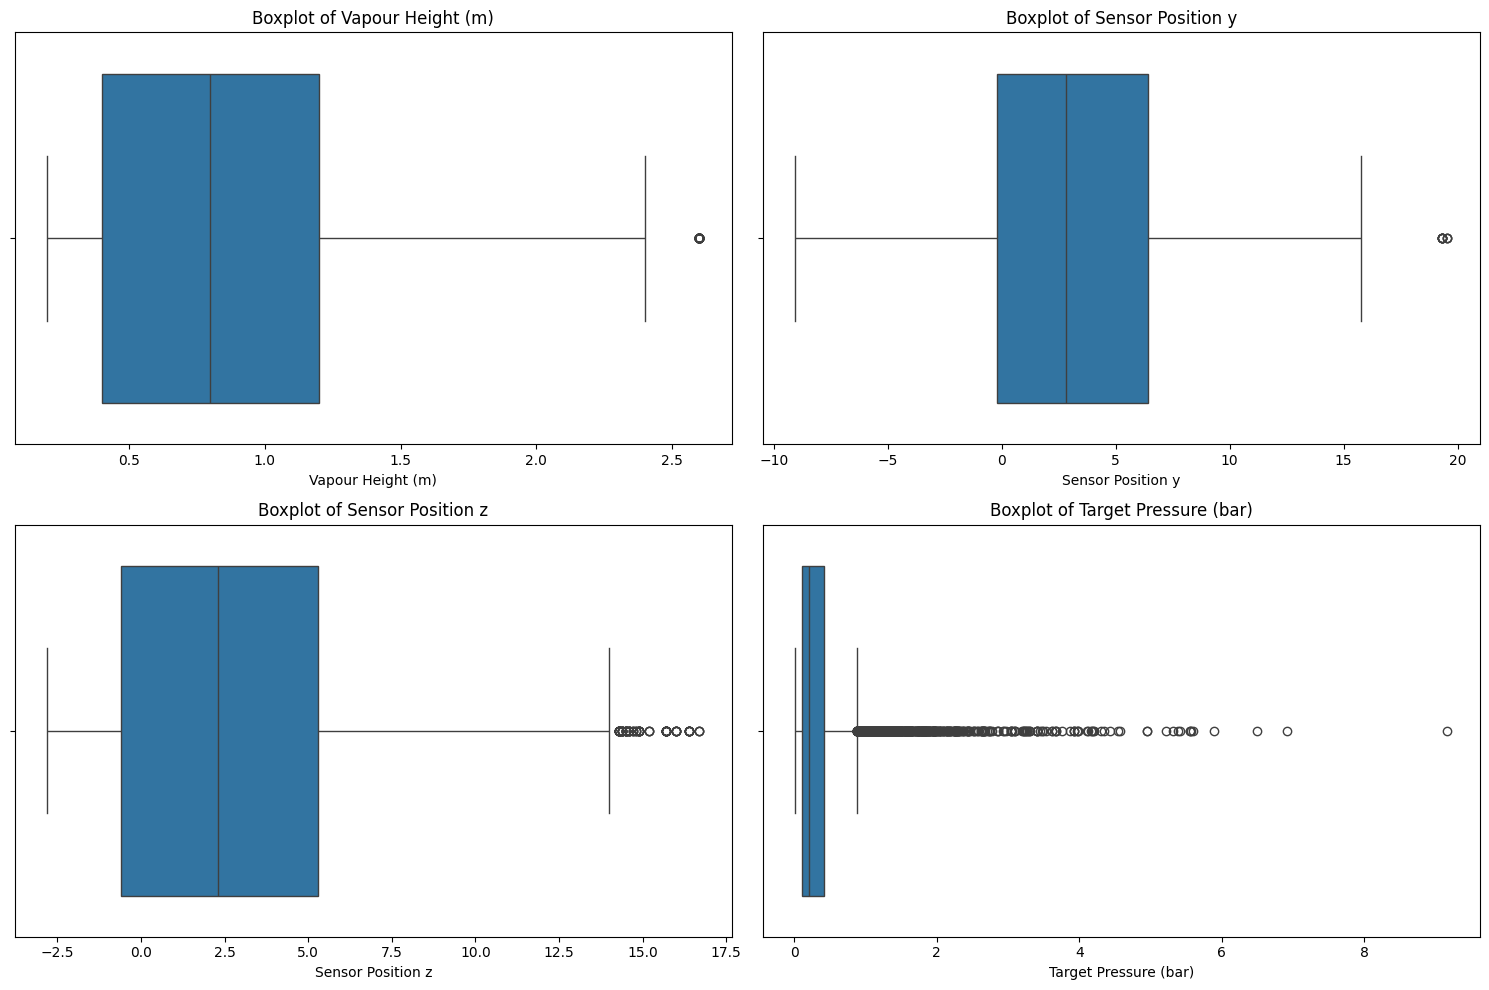

In [14]:
#Setting up the figure size and layout
plt.figure(figsize=(15, 10))

# Creating subplots for each column with outliers
columns_with_outliers = ['Vapour Height (m)', 'Sensor Position y', 'Sensor Position z', 'Target Pressure (bar)']
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

**FEATURE SCALING**

The sensor position y and z t indicate specific locations that could be physically higher or lower than most other sensors. This can be a part of the data and normalizing on treating outliers may cause disruption in actual data hence i decided to keep them as it is. However, for Target Pressure bar, the extreme values can significantly affect the model's performance therefore i normalized them by applying a log transformation to reduce the skewness and lessen the effect of extreme values. For vapour height, i decided to winsorize them cuz there were wasnt too many values that may effect the data too much.

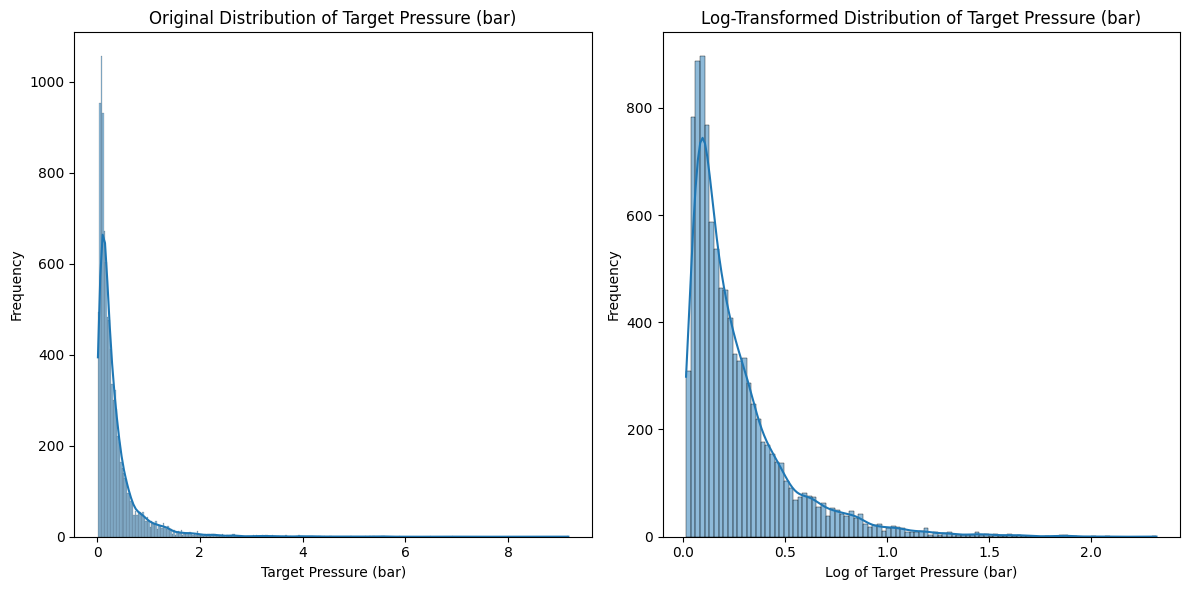

In [15]:
#Taking Log on Target Pressure Bar
# Save original target for comparison
original_target = train_data['Target Pressure (bar)'].copy()

# Apply log transformation to 'Target Pressure (bar)'
train_data['Target Pressure (bar)'] = np.log1p(train_data['Target Pressure (bar)'])

# Plotting both original and transformed distributions
plt.figure(figsize=(12, 6))

# Original 'Target Pressure (bar)'
plt.subplot(1, 2, 1)
sns.histplot(original_target, kde=True)
plt.title('Original Distribution of Target Pressure (bar)')
plt.xlabel('Target Pressure (bar)')
plt.ylabel('Frequency')

# Log-Transformed 'Target Pressure (bar)'
plt.subplot(1, 2, 2)
sns.histplot(train_data['Target Pressure (bar)'], kde=True)
plt.title('Log-Transformed Distribution of Target Pressure (bar)')
plt.xlabel('Log of Target Pressure (bar)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Winsorized Vapour Height (m)')

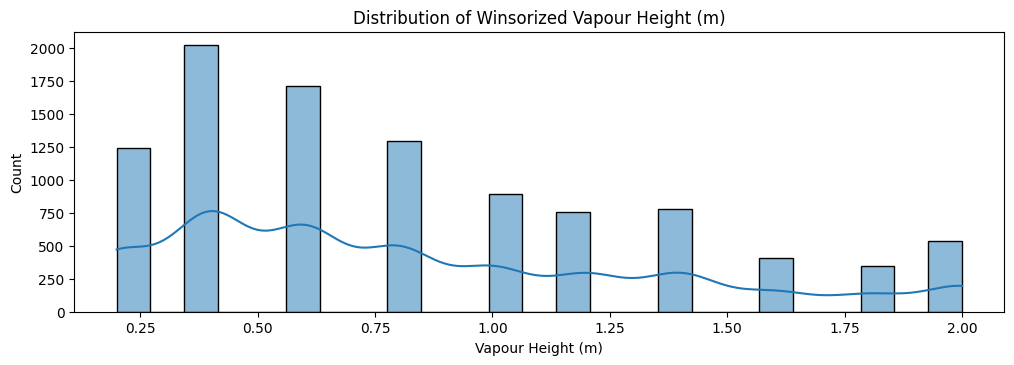

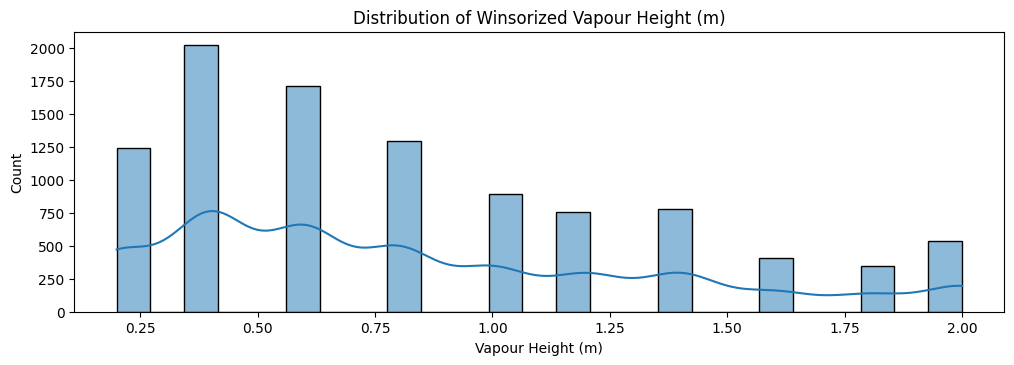

In [16]:
#winsorizing Vapour Height
# FOR TRAIN DATA
train_data['Vapour Height (m)'] = winsorize(train_data['Vapour Height (m)'], limits=[0, 0.05])

# Plotting to see the effect of transformations
plt.figure(figsize=(12, 8))

# Subplot for Winsorized 'Vapour Height (m)'
plt.subplot(2, 1, 1)
sns.histplot(train_data['Vapour Height (m)'], kde=True)
plt.title('Distribution of Winsorized Vapour Height (m)')


test_data['Vapour Height (m)'] = winsorize(test_data['Vapour Height (m)'], limits=[0, 0.05])

# Plotting to see the effect of transformations
plt.figure(figsize=(12, 8))

# Subplot for Winsorized 'Vapour Height (m)'
plt.subplot(2, 1, 1)
sns.histplot(train_data['Vapour Height (m)'], kde=True)
plt.title('Distribution of Winsorized Vapour Height (m)')



## **FEATURE ENGINEERING**

My approach to Feature Engineering was to find and implement as many relevant ideas i can find to create further features and then find through correlation and other feature selection methods if they are worth keeping to train models


**Tank Dimension Ratios:** (Aspect Ratio of the Tank)
 Ratios of height to width and length to width can describe the shape of the tank, which might influence how pressure is built or released.

In [17]:
# Tank Dimension Ratios
# Training Data
train_data['Tank Height to Width Ratio'] = train_data['Tank Height (m)'] / train_data['Tank Width (m)']
test_data['Tank Height to Width Ratio'] = test_data['Tank Height (m)'] / test_data['Tank Width (m)']

# Testing Data
train_data['Tank Length to Width Ratio'] = train_data['Tank Length (m)'] / train_data['Tank Width (m)']
test_data['Tank Length to Width Ratio'] = test_data['Tank Length (m)'] / test_data['Tank Width (m)']

**Relative Positioning:** Distance Ratios/Relative distances of the obstacle to the tank dimensions could be insightful, indicating how close the obstacle is in relation to the tank size.

In [18]:
# Relative Positioning
# Training Data
train_data['Relative Obstacle Distance'] = train_data['Obstacle Distance to BLEVE (m)'] / train_data['Tank Width (m)']

# Testing Data
test_data['Relative Obstacle Distance'] = test_data['Obstacle Distance to BLEVE (m)'] / test_data['Tank Width (m)']

**Combined Temperature Features:**
The difference between the vapor and liquid temperatures might indicate the volatility or the stability of the contents.

In [19]:
# Combined Temperature Features
# Training Data
train_data['Temperature Difference'] = train_data['Vapour Temperature (K)'] - train_data['Liquid Temperature (K)']

# Testing Data
test_data['Temperature Difference'] = test_data['Vapour Temperature (K)'] - test_data['Liquid Temperature (K)']

**Scaled Pressure:** Scaling the failure pressure by critical temperatures or pressures might provide a normalized view of the risk or potential impact.

In [20]:
# Scaled Pressure
# Training Data
train_data['Scaled Tank Failure Pressure'] = train_data['Tank Failure Pressure (bar)'] / train_data['Liquid Critical Pressure (bar)']

# Testing Data
test_data['Scaled Tank Failure Pressure'] = test_data['Tank Failure Pressure (bar)'] / test_data['Liquid Critical Pressure (bar)']

**Tank Base Area:** This could relate to how much liquid is in direct contact with the base, possibly affecting how heat transfers and pressures develop.

In [21]:
# Base Area
# Training Data
train_data['Tank Base Area (m^2)'] = train_data['Tank Width (m)'] * train_data['Tank Length (m)']

# Testing Data
test_data['Tank Base Area (m^2)'] = test_data['Tank Width (m)'] * test_data['Tank Length (m)']

**Tank Surface Area:** A larger surface area could mean more exposure to external conditions, influencing how pressures inside the tank build up or dissipate.

In [22]:
# Surface Area = 2(wl + hl + hw) where w = width, l = length, h = height
# Training Data
train_data['Tank Surface Area (m^2)'] = 2 * (train_data['Tank Width (m)'] * train_data['Tank Length (m)'] +
                                              train_data['Tank Height (m)'] * train_data['Tank Length (m)'] +
                                              train_data['Tank Height (m)'] * train_data['Tank Width (m)'])

# Testing Data
test_data['Tank Surface Area (m^2)'] = 2 * (test_data['Tank Width (m)'] * test_data['Tank Length (m)'] +
                                             test_data['Tank Height (m)'] * test_data['Tank Length (m)'] +
                                             test_data['Tank Height (m)'] * test_data['Tank Width (m)'])


**Combined Gas and Liquid Properties**
This could provide insights into the state of the mixture within the tank, which might impact how pressures are developed or relieved.


In [23]:
# Combined Gas and Liquid Properties

# Training Data
train_data['Vapour to Liquid Ratio'] = train_data['Vapour Height (m)'] / train_data['Tank Height (m)']

# Testing Data
test_data['Vapour to Liquid Ratio'] = test_data['Vapour Height (m)'] / test_data['Tank Height (m)']

**Normalized Obstacle Proximity:** Comparing the obstacle distance to the overall size of the tank setup might give a better sense of how constrained the space is, potentially affecting the dynamics of the explosion.

In [24]:
# Operational Conditions

#Training Data
train_data['Normalized Obstacle Distance'] = train_data['Obstacle Distance to BLEVE (m)'] / (train_data['Tank Width (m)'] + train_data['Tank Length (m)'])

#Testing Data
test_data['Normalized Obstacle Distance'] = test_data['Obstacle Distance to BLEVE (m)'] / (test_data['Tank Width (m)'] + test_data['Tank Length (m)'])


**Average Temperature:** An average of the vapor and liquid temperatures might simplify the model without losing critical thermal information.

In [25]:
# Average Temperature
#Testing Data
train_data['Average Temperature (K)'] = (train_data['Vapour Temperature (K)'] + train_data['Liquid Temperature (K)']) / 2

#Training Data
test_data['Average Temperature (K)'] = (test_data['Vapour Temperature (K)'] + test_data['Liquid Temperature (K)']) / 2

**Pressure Differential:** The difference between the tank failure pressure and the substance critical pressure might indicate how close the system is to critical conditions.

In [26]:
# Pressure Differential
#Training Data
train_data['Pressure Differential (bar)'] = train_data['Tank Failure Pressure (bar)'] - train_data['Liquid Critical Pressure (bar)']

#Testing Data
test_data['Pressure Differential (bar)'] = test_data['Tank Failure Pressure (bar)'] - test_data['Liquid Critical Pressure (bar)']


**Obstacle Impact Factor:** Creating a feature that combines obstacle dimensions with its distance could provide a proxy for how much the obstacle might affect the blast wave propagation.

In [27]:
#Obstacle Impact Factor:
#Training Data
train_data['Obstacle Impact Factor'] = (train_data['Obstacle Width (m)'] * train_data['Obstacle Height (m)']) / train_data['Obstacle Distance to BLEVE (m)']

#Training Data
test_data['Obstacle Impact Factor'] = (test_data['Obstacle Width (m)'] * test_data['Obstacle Height (m)']) / test_data['Obstacle Distance to BLEVE (m)']


**Volume :** By multiplying thr width,length and height we can find what is inside space of the tank and obstacle

In [28]:
# Volume of tank
#Training Data
train_data['Tank Volume (m^3)'] = train_data['Tank Width (m)'] * train_data['Tank Length (m)'] * train_data['Tank Height (m)']

#Testing Data
test_data['Tank Volume (m^3)'] = test_data['Tank Width (m)'] * test_data['Tank Length (m)'] * test_data['Tank Height (m)']

In [29]:
# Volume of Obstacle
#Training Data
train_data['Obstacle Volume (m^3)'] = train_data['Obstacle Width (m)'] * train_data['Obstacle Height (m)'] * train_data['Obstacle Thickness (m)']

#Testing Data
test_data['Obstacle Volume (m^3)'] = test_data['Obstacle Width (m)'] * test_data['Obstacle Height (m)'] * test_data['Obstacle Thickness (m)']

In [30]:
# Data information after Engineering

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   Tank Failure Pressure (bar)      10000 non-null  float64
 2   Liquid Ratio (%)                 10000 non-null  float64
 3   Tank Width (m)                   10000 non-null  float64
 4   Tank Length (m)                  10000 non-null  float64
 5   Tank Height (m)                  10000 non-null  float64
 6   BLEVE Height (m)                 10000 non-null  float64
 7   Vapour Height (m)                10000 non-null  float64
 8   Vapour Temperature (K)           10000 non-null  float64
 9   Liquid Temperature (K)           10000 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10000 non-null  int64  
 11  Obstacle Width (m)               10000 non-null  int64  
 12  Obstacle Height (m)

## **FEATURE SELECTION**

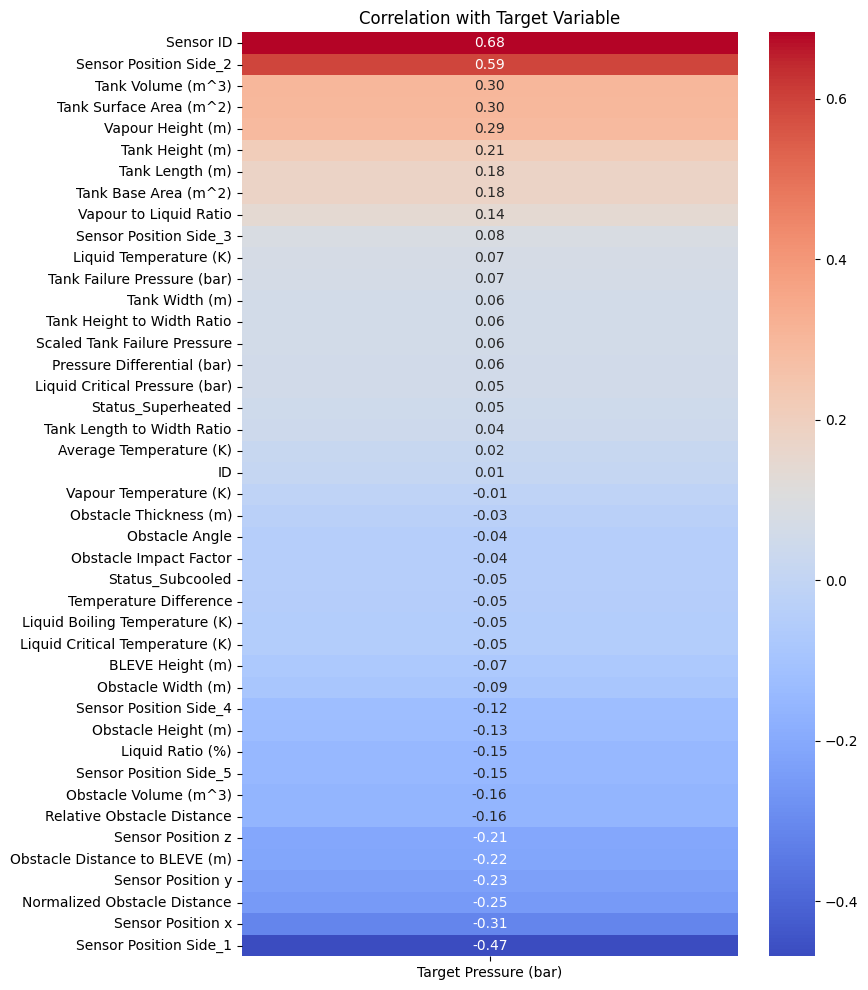

In [31]:
#Finding Correlation between all features

correlation_matrix = train_data.corr()
# Assuming 'Target Pressure (bar)' is the name of your target variable
target_correlation = correlation_matrix['Target Pressure (bar)'].drop('Target Pressure (bar)').sort_values(ascending=False)

# To make the plot more readable, convert the Series to a DataFrame
target_correlation_df = target_correlation.to_frame()

plt.figure(figsize=(8, 12))
sns.heatmap(target_correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation with Target Variable')
plt.show()

In [32]:
#Data Splitting

# Prepare the features and target variable
X = train_data.drop('Target Pressure (bar)', axis=1)
y = train_data['Target Pressure (bar)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:

# Define the feature selection method
# LassoCV is Lasso with built-in cross-validation to find the best alpha (regularization strength)
lasso = LassoCV(cv=5)

# Select features using LassoCV
selector = SelectFromModel(lasso).fit(X_train, y_train)

# Transform training and test sets
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


# Get the selected features
selected_features = X_train.columns[selector.get_support()]
print(f'Selected features: {selected_features}')


Selected features: Index(['Tank Failure Pressure (bar)', 'Vapour Height (m)',
       'Liquid Temperature (K)', 'Obstacle Width (m)', 'Obstacle Angle',
       'Liquid Critical Temperature (K)', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'Sensor Position Side_1',
       'Sensor Position Side_2', 'Tank Base Area (m^2)',
       'Tank Surface Area (m^2)', 'Obstacle Impact Factor',
       'Tank Volume (m^3)', 'Obstacle Volume (m^3)'],
      dtype='object')


Ive used Lasso to select the features because it tend to be the most relevant ones for prediction, as Lasso's regularization penalty encourages sparsity by shrinking less important features' coefficients to zero. y using cross-validation, LassoCV can find the optimal regularization strength (alpha) that minimizes prediction error on unseen data, leading to better generalization.

# **MODEL DEVELOPMENT**

## **MODEL 1 : LINEAR REGRESSION**

In [34]:

# Use the training and testing data transformed using features selected by LASSO
X_train_selected = selector.transform(X_train)  # Transform training set
X_test_selected = selector.transform(X_test)    # Transform test set

# traiing the linear regression model with the set of selected features from LASSO
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

# Calculate MAPE - custom function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100


# Predict and evaluate with the selected features
y_pred_selected = lr_model_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)

# Calculate MAPE - using the already defined custom function
mape_selected = mean_absolute_percentage_error(y_test, y_pred_selected)

# Results Output
print(f'Mean Squared Error with selected features: {mse_selected}')
print(f'R^2 Score with selected features: {r2_selected}')
print(f'MAE (Mean Absolute Error) with selected features: {mae_selected}')
print(f'MAPE (Mean Absolute Percentage Error) with selected features: {mape_selected}%')


Mean Squared Error with selected features: 0.01785494625038403
R^2 Score with selected features: 0.7173331755285086
MAE (Mean Absolute Error) with selected features: 0.09377006206758363
MAPE (Mean Absolute Percentage Error) with selected features: 56.84111740949266%


In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms (without creating squared terms)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = poly.fit_transform(X_train_selected)
X_test_interaction = poly.transform(X_test_selected)

# Re-train the linear regression model using interaction terms
lr_model_interaction = LinearRegression()
lr_model_interaction.fit(X_train_interaction, y_train)

# Predict and evaluate with interaction terms
y_pred_interaction = lr_model_interaction.predict(X_test_interaction)
mse_interaction = mean_squared_error(y_test, y_pred_interaction)
r2_interaction = r2_score(y_test, y_pred_interaction)
mae_interaction = mean_absolute_error(y_test, y_pred_interaction)

# Calculate MAPE - using the already defined custom function
mape_interaction = mean_absolute_percentage_error(y_test, y_pred_interaction)

# Output the results
print(f'Mean Squared Error with interaction features: {mse_interaction}')
print(f'R^2 Score with interaction features: {r2_interaction}')
print(f'MAE (Mean Absolute Error) with interaction features: {mae_interaction}')
print(f'MAPE (Mean Absolute Percentage Error) with interaction features: {mape_interaction}%')

Mean Squared Error with interaction features: 0.007540553091531367
R^2 Score with interaction features: 0.8806233204372702
MAE (Mean Absolute Error) with interaction features: 0.059402634693033876
MAPE (Mean Absolute Percentage Error) with interaction features: 31.798961800755265%


Here ive used the the polynomial features as these interaction terms capture relationships between different features that may not be captured by considering each feature individually. Ive used hyperparameter of degree being 2 that allows two features to be multipler to find better results.

In [36]:
#Implementing model on test file to find predictions

X_test_poly = poly.transform(test_data[selected_features])

# Make predictions using the trained model
test_data['Target Pressure (bar)'] = lr_model_interaction.predict(X_test_poly)


output = test_data[['ID', 'Target Pressure (bar)']]
output.to_csv('Linear_predictions.csv', index=False)

# Automatic downloading file
files.download('Linear_predictions.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**MODEL 2 : DECION TREE AND RANDOM FOREST**

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Setup the parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Setup the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')

# Fit the model using the selected features from the training data
grid_search_dt.fit(X_train[selected_features], y_train)

# Best model
best_dt_model = grid_search_dt.best_estimator_

# Predict and evaluate with the Decision Tree model
y_pred_dt = best_dt_model.predict(X_test[selected_features])
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)

# Output the results
print(f'Decision Tree - Best Parameters: {grid_search_dt.best_params_}')
print(f'Decision Tree - Mean Squared Error: {mse_dt}')
print(f'Decision Tree - R^2 Score: {r2_dt}')
print(f'Decision Tree - Mean Absolute Error: {mae_dt}')
print(f'Decision Tree - Mean Absolute Percentage Error: {mape_dt}%')


Decision Tree - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - Mean Squared Error: 0.008419621364245754
Decision Tree - R^2 Score: 0.8667065360539808
Decision Tree - Mean Absolute Error: 0.05046231821771787
Decision Tree - Mean Absolute Percentage Error: 20.546451643910064%


In this ive used the following hyperparaters to tune the model using gridsearch max_depth: Maximum depth of the decision tree.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model using the selected features (Using Lasso) from the training data
rf_model.fit(X_train[selected_features], y_train)

# Predict and evaluate with the Random Forest model
y_pred_rf = rf_model.predict(X_test[selected_features])
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Output the results
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')
print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - Mean Absolute Percentage Error: {mape_rf}%')

Random Forest - Mean Squared Error: 0.0035423956949035035
Random Forest - R^2 Score: 0.9439193079576861
Random Forest - Mean Absolute Error: 0.03525047166711285
Random Forest - Mean Absolute Percentage Error: 15.716623675460777%


In [39]:
#Implementing model on test file to find predictions
X_test_actual = test_data[selected_features]

#Using already trained random forest model : rf_model
test_data['Target Pressure (bar)'] = rf_model.predict(X_test_actual)

# Save predictions to a CSV file
output = test_data[['ID', 'Target Pressure (bar)']]
output_filename = 'RandomForest_predictions.csv'
output.to_csv(output_filename, index=False)

# Download the file to your local system
files.download(output_filename)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


## **MODEL 3 : XGBOOST**

In [40]:
import xgboost as xgb

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

# Fit the model to the training set
xgb_model.fit(X_train_selected, y_train)

# Predict the target on the test split
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Output the results
print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R^2 Score: {r2_xgb}')
print(f'XGBoost - Mean Absolute Error: {mae_xgb}')
print(f'XGBoost - Mean Absolute Percentage Error: {mape_xgb}%')

XGBoost - Mean Squared Error: 0.0026157327973846266
XGBoost - R^2 Score: 0.9585895766285636
XGBoost - Mean Absolute Error: 0.03273571712103871
XGBoost - Mean Absolute Percentage Error: 15.454563603309005%


In [41]:
#Using the same feature list generated from LASSO on Test Set
X_test_preprocessed = test_data[selected_features]

# Use the trained XGBoost model to make predictions on the test data
test_data['Target Pressure (bar)'] = xgb_model.predict(X_test_preprocessed)

# Prepare the output DataFrame for download
output = test_data[['ID', 'Target Pressure (bar)']]
output_filename = 'xgboost_predictions.csv'
output.to_csv(output_filename, index=False)

# Download the file to your local machine
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **MODEL 4 : SVR (SUPPORT VECTOR REGRESSION)**

In [42]:

# Define a pipeline that includes scaling and the SVR
pipeline = make_pipeline(StandardScaler(), SVR())

# Define the parameter grid for SVR
param_grid = {
    'svr__C': [1, 10],  # 'svr__' is used to specify that the parameter belongs to the SVR step of the pipeline
    'svr__epsilon': [0.1, 0.01, 0.001],
    'svr__gamma': ['auto']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_selected, y_train)

# Best estimator found by GridSearchCV
best_svr = grid_search.best_estimator_

# Predict using the best model
y_pred_svr = best_svr.predict(X_test_selected)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Assuming you have a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

# Output the results
print(f'Support Vector Regression - Best Parameters: {grid_search.best_params_}')
print(f'Support Vector Regression - Mean Squared Error: {mse_svr}')
print(f'Support Vector Regression - R^2 Score: {r2_svr}')
print(f'Support Vector Regression - Mean Absolute Error: {mae_svr}')
print(f'Support Vector Regression - Mean Absolute Percentage Error: {mape_svr}%')


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Support Vector Regression - Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__gamma': 'auto'}
Support Vector Regression - Mean Squared Error: 0.002182217170668471
Support Vector Regression - R^2 Score: 0.9654526880512591
Support Vector Regression - Mean Absolute Error: 0.028785272461980364
Support Vector Regression - Mean Absolute Percentage Error: 13.551702055707931%


In [43]:
# Apply the model to the test dataset
test_data['Target Pressure (bar)'] = best_svr.predict(test_data[selected_features])

# Output the predictions to a CSV file and download
output = test_data[['ID', 'Target Pressure (bar)']]
output.to_csv('svr_predictions.csv', index=False)
files.download('svr_predictions.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **MODEL 5 : NEURAL NETWORKS**

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from google.colab import files

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Neural network architecture
nnmodel = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
nnmodel.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Training model
nnmodel.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating model
y_pred_nn = nnmodel.predict(X_test_scaled).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mape_nn = mean_absolute_percentage_error(y_test, y_pred_nn)

# Output results
print(f'Neural Network - Mean Squared Error: {mse_nn}')
print(f'Neural Network - R^2 Score: {r2_nn}')
print(f'Neural Network - Mean Absolute Error: {mae_nn}')
print(f'Neural Network - Mean Absolute Percentage Error: {mape_nn}%')

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.0163 - val_loss: 0.0086
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0052
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0052
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 8/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0045
Epoch 9/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0051
Epoch 10/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0038

In [45]:
# Applying the model to the test dataset
test_data_scaled = scaler.transform(test_data[selected_features])
test_data['Target Pressure (bar)'] = nnmodel.predict(test_data_scaled).flatten()

# Output to csv
output = test_data[['ID', 'Target Pressure (bar)']]
output.to_csv('neural_network_predictions.csv', index=False)
files.download('neural_network_predictions.csv')


 35/101 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


101/101 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **MODEL 6 : CATBOOST (Best Model)**

In [46]:

from catboost import CatBoostRegressor

# Using 'selected_features' from LASSO
X_train = train_data[selected_features]
y_train = train_data['Target Pressure (bar)']
X_test = test_data[selected_features]

# Initialize the CatBoost Regressor
catmodel = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          verbose=100,
                          random_seed=42)

# Fit the model
catmodel.fit(X_train, y_train)

# Predict the target on the training set and test set
y_pred_train = catmodel.predict(X_train)
y_pred_test = catmodel.predict(X_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print(f'Training - Mean Squared Error: {mse_train}')
print(f'Training - R^2 Score: {r2_train}')
print(f'Training - Mean Absolute Error: {mae_train}')
print(f'Training - Mean Absolute Percentage Error: {mape_train}%')




0:	learn: 0.2379116	total: 52.7ms	remaining: 52.6s
100:	learn: 0.0592959	total: 471ms	remaining: 4.19s
200:	learn: 0.0464647	total: 906ms	remaining: 3.6s
300:	learn: 0.0401986	total: 1.34s	remaining: 3.12s
400:	learn: 0.0361751	total: 1.75s	remaining: 2.62s
500:	learn: 0.0332715	total: 2.15s	remaining: 2.14s
600:	learn: 0.0310222	total: 2.54s	remaining: 1.69s
700:	learn: 0.0291370	total: 2.95s	remaining: 1.26s
800:	learn: 0.0275463	total: 3.35s	remaining: 831ms
900:	learn: 0.0262048	total: 3.75s	remaining: 412ms
999:	learn: 0.0251322	total: 4.13s	remaining: 0us
Training - Mean Squared Error: 0.0006316258384131725
Training - R^2 Score: 0.9901145360718304
Training - Mean Absolute Error: 0.017999887325188545
Training - Mean Absolute Percentage Error: 9.677510720866344%


In [47]:
# Making predictions on the test dataset
test_data['Target Pressure (bar)'] = y_pred_test

output = test_data[['ID', 'Target Pressure (bar)']]
output_filename = 'catboost_predictions.csv'
output.to_csv(output_filename, index=False)

# output as csv\
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODEL INTERPRETATION**

**BEST TWO MODELS SELECTED BASED ON MAPE ON KAGGLE**


1.   CATBOOST (MAPE : 25.04551 ON PUBLIC LEADERBOARD)


## **INTERPRETATION OF CATBOOST (BEST RESULTS)**


In [48]:
import shap

# Create the SHAP Explainer using the CatBoost model
explainer = shap.TreeExplainer(catmodel)

# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Optionally, compute SHAP values for the test data if needed
shap_values_test = explainer.shap_values(X_test)

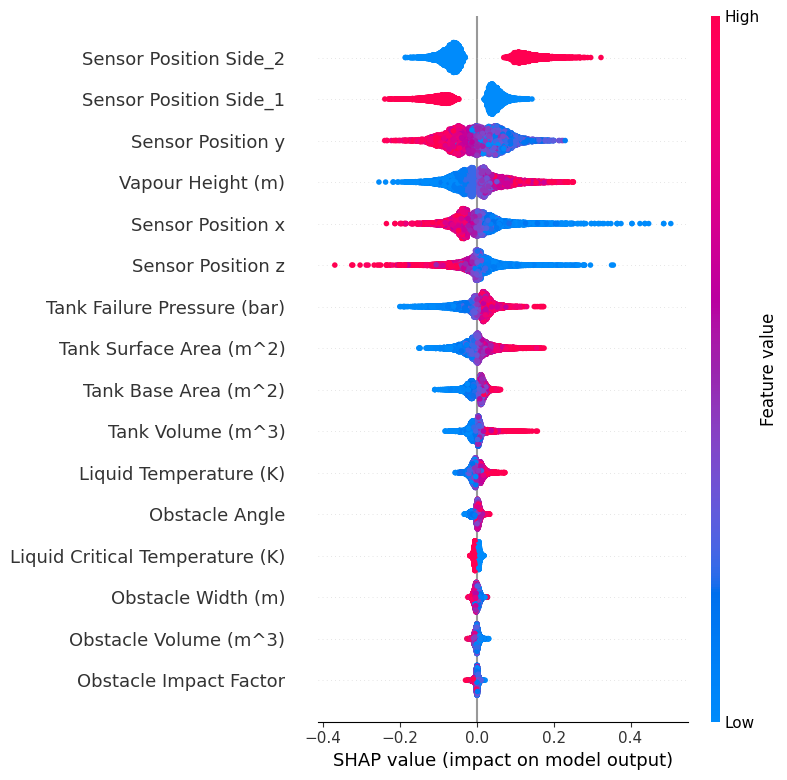

In [49]:
# Summary plot showing the contribution of features to the prediction
shap.summary_plot(shap_values, X_train, feature_names=selected_features)

The feature effect graph above shows the contribution of each feature to the prediction of a model. The ones at the top are having the highest influence on the prediction compared to ones at the bottom. Sensor Position Side_2 and Sensor Position Side_1: These features appear to be highly influential, showing a mix of positive and significant negative effects. This suggests that the sensor positions on these sides of the obstacle have a variable but often substantial impact on the model's predictions. In other words, positions of the sensors likely affect how they capture pressure waves, impacted by factors like angle and distance to the explosion. Sensor Position y, x, z are also some of them that rank higher. These features, representing the 3D coordinates of sensors, have varied impacts. Their SHAP distributions are mixed, indicating the complex spatial dynamics in how pressure waves propagate and are captured by sensors. apour Height: This feature shows a moderate influence with a tendency to increase the prediction as the height increases. In the context of BLEVEs, higher vapour columns within a tank could contribute to more intense pressure outputs upon explosion. Other insights realized from this can be that the models should be more depenedent on the feature engineering that is realted to the sensor position and sides. Also Features like Obstacle Volume and Impact Factor show minimal influence and could potentially be omitted to simplify the model

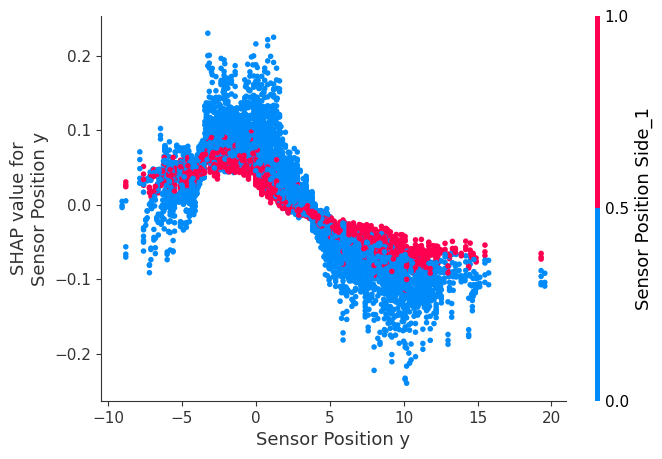

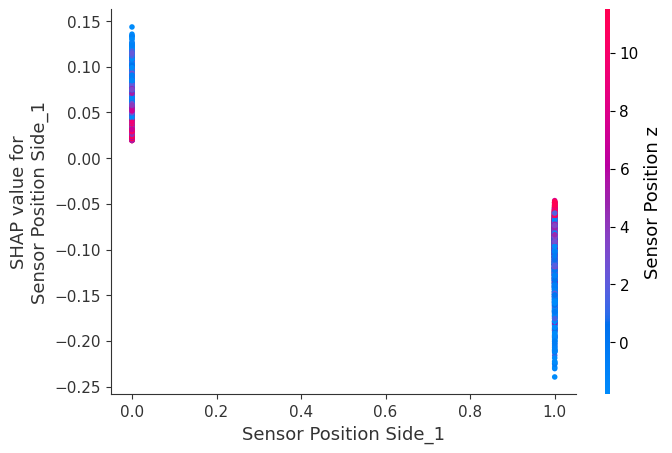

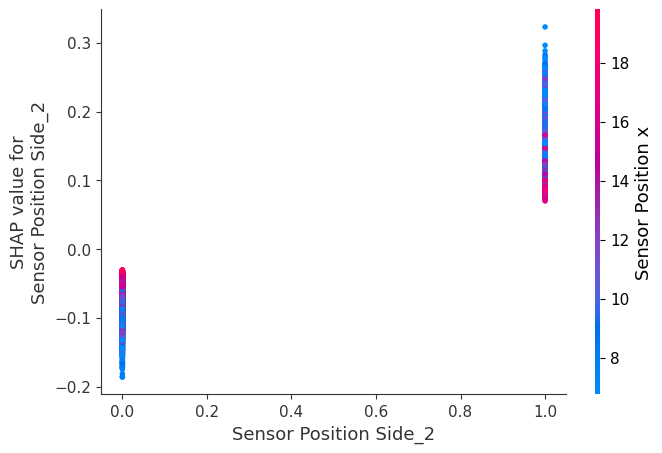

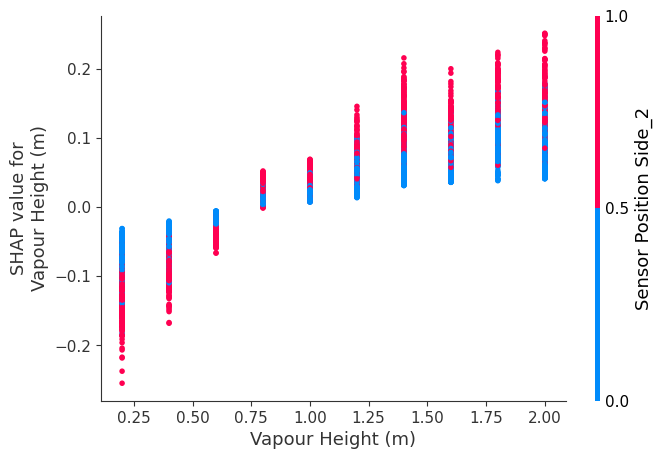

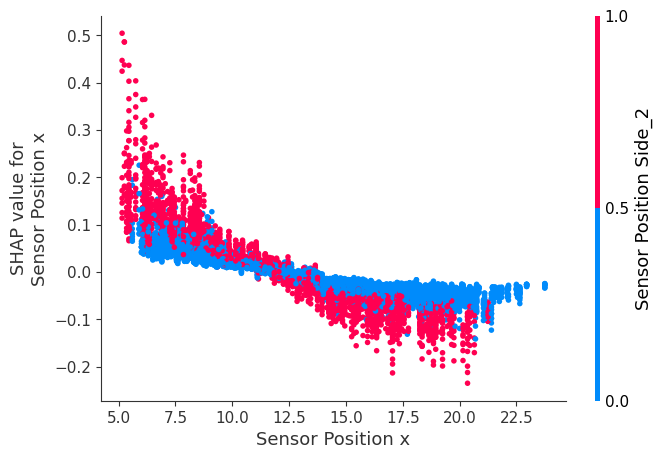

In [50]:
# Generate SHAP partial dependency plots for each significant feature identified earlier
significant_features = ['Sensor Position y', 'Sensor Position Side_1', 'Sensor Position Side_2',
                        'Vapour Height (m)', 'Sensor Position x',]

for feature in significant_features:
    if feature in selected_features:
        shap.dependence_plot(feature, shap_values, X_train, display_features=X_train)


1. Graph 1: Sensor Position y with Sensor Position Side 1

There is a notable trend where SHAP values are generally positive when the sensor position y is between -10 and 0, suggesting that as sensors are positioned more negatively along the y-axis, they tend to increase the predicted pressure. As the position moves towards the positive side from 0 to around 15, the influence on the model output shifts from positive to negative, indicating that sensors located further along the positive y-axis might be in positions that experience lower pressure.
This feature's impact varies significantly across its range, highlighting its importance in predicting the outcome.
2. Graph 2 : Sensor Position Side 1 with sensor postion z

The SHAP values for Sensor Position Side_1 show only a small range of variation, predominantly hovering near zero across different positions.
The plot is color-coded with Sensor Position z, indicating how the vertical position of the sensor influences the effect of Sensor Position Side_1. Despite the vertical variation, the overall impact of Sensor Position Side_1 is minimal.
This suggests that the exact side of the sensor (whether left or right) does not significantly influence the predicted pressure outcomes compared to other positional factors. however, when combined with other factors this can allow better results of prediction

3. Graph 3 : Sensor Position Side 2 with sensor position x


Similar to Side_1, Side_2 shows minimal variation in SHAP values. The impact of the sensor position on Side_2 is consistently low (close to zero), with occasional increases or decreases.
This consistent pattern implies that the sensor's side does not play a significant role in affecting the model's pressure prediction but combining it with other factors like the position x can allow changes in predicted values.

4. Graph 4 : Vapour Height with sensor position side 2

The SHAP values for Vapour Height show a pattern where certain discrete heights have a consistent impact on the model’s predictions.
Heights at the lower end (0.25 m) and higher end (2.0 m) appear to have more positive impacts, suggesting these conditions might be associated with stronger or more hazardous pressure levels.
The intermediate heights show variable but generally less impoctful effects, which may be due to the different behavior of vapor at these levels affecting the explosion's outcome.

5. Graph 5 : Sensor Position x with sensor position side 2

This plot reveals a downward trend in SHAP values as the sensor position x increases.
When sensors are closer to the origin (lower x values), they tend to have a higher, positive impact on the predicted pressure, likely indicating proximity to the explosion source.
As x increases, indicating distance from the source, the influence on the pressure prediction decreases, potentially due to geomatric structure of the blast wave.

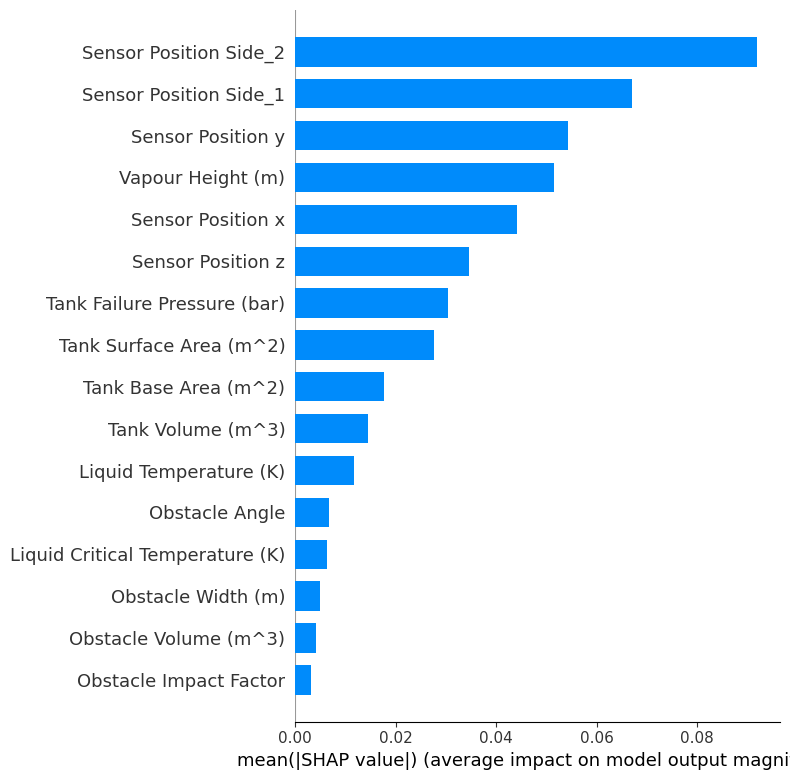

In [51]:
# Feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=selected_features)

Majority of details in this graph are similar to the feature effect plot. On the x axis it shows the mean absolute values of SHAP which measures the average impact of each feature. On the Y axis there is the list of features that are shown ascendingly according to importance. The positioning of sensors on Side_2 significantly affects the model's pressure predictions, suggesting that this side of the sensor array captures critical dynamics of the blast wave. lso highly influential, this feature's positioning vertically influences the predictions significantly. Changes in the y-coordinate of sensors are likely associated with how the sensors capture the pressure changes. Vapour Height: The height of the vapour column in the tank also plays a crucial role in determining the predicted pressures. This suggests that vapour dynamics, possibly including the volume and characteristics of the vapour, are critical to understanding the intensity and spread of the blast. Tank-related Features (Tank Failure Pressure, Tank Surface Area, Tank Base Area, Tank Volume): These features, while having some impact, are less influential They provide a context for the tank’s structural integrity and physical characteristics but are secondary to the direct sensor readings.

Top Correlated Feature Pairs:
Tank Surface Area (m^2)  Tank Volume (m^3)          0.939627
Tank Base Area (m^2)     Tank Surface Area (m^2)    0.815621
                         Tank Volume (m^3)          0.728811
Obstacle Impact Factor   Obstacle Volume (m^3)      0.622779
Obstacle Volume (m^3)    Obstacle Width (m)         0.439224
dtype: float64


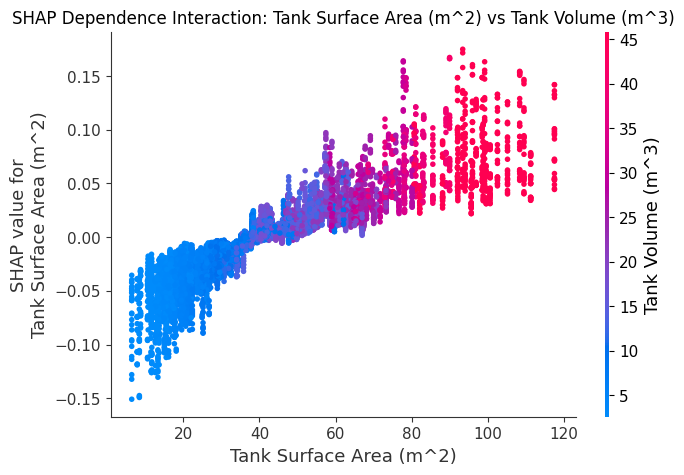

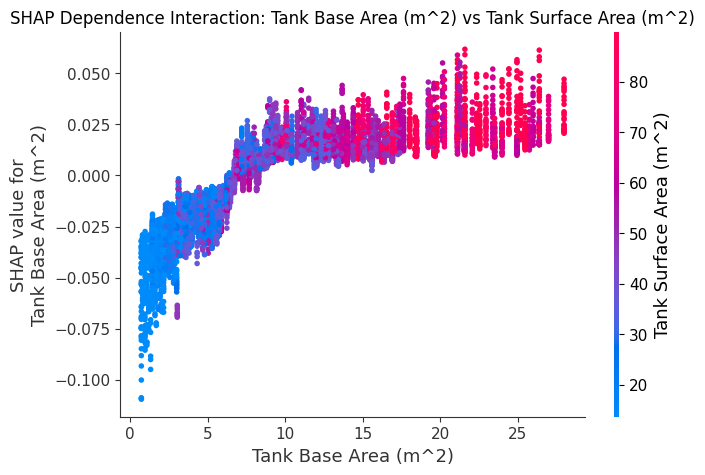

In [52]:

if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train, columns=selected_features)
else:
    X_train_df = X_train

# Calculate the correlation matrix
correlation_matrix = X_train_df.corr()

# Find and display top correlated pairs
highly_correlated_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1]  # remove self-correlation
top_correlated_pairs = highly_correlated_pairs.abs().drop_duplicates().head(5)

print("Top Correlated Feature Pairs:")
print(top_correlated_pairs.head(5))


# Visualize interactions for the top correlated pairs (up to 2 for brevity)
for (feature1, feature2) in top_correlated_pairs.index[:2]:
    shap.dependence_plot(feature1, shap_values, X_train_df, interaction_index=feature2, show=False)
    plt.title(f"SHAP Dependence Interaction: {feature1} vs {feature2}")
    plt.show()

Graph 1 : Tank Surface Area with Tank Volume

General Trend: As the tank surface area increases, the SHAP values increase from negative to positive, suggesting that larger tanks tend to increase the predicted pressure impact of a BLEVE.
Volume Impact: The color gradient shows that for smaller tank volumes (blue), the SHAP values are generally lower (more negative). As the tank volume increases (moving towards red), the SHAP values also increase, becoming more positive.
Critical Insight: Larger tanks with greater surface area and volume contribute to higher predicted pressures, possibly due to the larger quantity of materials capable of contributing to the explosion, and the greater surface area affecting the dynamics of heat and pressure release.

Graph 2 : Tank base Area with Surface Area

General Trend: As the tank base area increases, SHAP values show a positive slope transitioning from strongly negative to mildly positive, suggesting that larger bases are associated with higher predicted pressures.
Surface Area Impact: Initially, for smaller tank bases (left side of the plot), SHAP values are negative across various surface areas, with lower values for smaller surface areas. As the base area increases, the impact on the model's prediction turns less negative and eventually positive, particularly noticeable in tanks with larger surface areas (represented by red dots).
Critical Insight: This interaction indicates that tanks with larger bases and surface areas have a more significant impact on predicted pressures. This could be due to increased stability and capacity of the tank, influencing how the tank fails and releases pressure in the event of a BLEVE.

### **INTERPRETATION OF INDIVIDUAL PREDICITION OF CATBOOST**




In [53]:
catmodel.fit(X_train, y_train)

# Predict the target on the training set
y_pred_train = catmodel.predict(X_train)

# Add the predictions as a new column to the training data
train_data['Predicted Pressure (bar)'] = y_pred_train

# Calculate the absolute percentage error for each prediction
train_data['Error (%)'] = np.abs(train_data['Target Pressure (bar)'] - train_data['Predicted Pressure (bar)']) / train_data['Target Pressure (bar)'] * 100

# Identify key instances
lowest_prediction = train_data.loc[train_data['Predicted Pressure (bar)'].idxmin()]
highest_prediction = train_data.loc[train_data['Predicted Pressure (bar)'].idxmax()]
largest_error = train_data.loc[train_data['Error (%)'].idxmax()]

# Print details of key instances
print("Lowest Prediction Details:\n", lowest_prediction)
print("Highest Prediction Details:\n", highest_prediction)
print("Largest Error Details:\n", largest_error)

0:	learn: 0.2379116	total: 4.33ms	remaining: 4.32s
100:	learn: 0.0592959	total: 459ms	remaining: 4.08s
200:	learn: 0.0464647	total: 883ms	remaining: 3.51s
300:	learn: 0.0401986	total: 1.31s	remaining: 3.04s
400:	learn: 0.0361751	total: 1.74s	remaining: 2.6s
500:	learn: 0.0332715	total: 2.2s	remaining: 2.19s
600:	learn: 0.0310222	total: 2.63s	remaining: 1.74s
700:	learn: 0.0291370	total: 3.06s	remaining: 1.3s
800:	learn: 0.0275463	total: 3.48s	remaining: 866ms
900:	learn: 0.0262048	total: 3.88s	remaining: 426ms
999:	learn: 0.0251322	total: 4.27s	remaining: 0us
Lowest Prediction Details:
 ID                                      8133
Tank Failure Pressure (bar)             10.9
Liquid Ratio (%)                    0.769053
Tank Width (m)                           0.6
Tank Length (m)                          6.8
Tank Height (m)                          1.6
BLEVE Height (m)                         1.6
Vapour Height (m)                        0.4
Vapour Temperature (K)                 463.6
L

In [54]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import shap
from IPython.display import display, HTML



# Initialize SHAP explainer for CatBoost
shap_explainer = shap.TreeExplainer(catmodel)
shap_values = shap_explainer.shap_values(X_train)

# Initialize JavaScript visualization in Jupyter Notebook
shap.initjs()

# Function to display SHAP force plot with enhanced details
def display_shap_force_plot(instance, description):
    shap_plot = shap.force_plot(shap_explainer.expected_value, shap_values[instance.name,:], X_train.iloc[instance.name,:], show=False)
    html_string = f"""
    <style>
        .shap_html {{
            background: #FFFFFF; /* White background */
            padding: 10px;       /* Some padding around the plot */
        }}
    </style>
    <h3>{description}</h3>
    <div class="shap_html">{shap_plot.html()}</div>
    """
    display(HTML(html_string))

# Display SHAP force plots for key instances
display_shap_force_plot(lowest_prediction, "SHAP Force Plot for Lowest Prediction ID 8133")
display_shap_force_plot(highest_prediction, "SHAP Force Plot for Highest Prediction ID 10110")
display_shap_force_plot(largest_error, "SHAP Force Plot for Largest Error ID 9913")

1. SHAP Force Plot for Lowest Prediction

Instance ID 8133

Prediction value: 0.00

Base value: 0.2682

Feature Contributions: Most of the features (represented by blue bars) are pushing the prediction lower from the base value. Notably, "Sensor Position Side_1 and 2 are pushing the results down. There are other important features like sensor position y and vapour height as well that are lowering the overall prediciton from the base. On the other hand just two are pushing it forward significantlyb which include "Sensor Position Z = -1.6" abd sensor position x = 7.55.

2. SHAP Force Plot for Highest Prediction

Instance ID 10110

Prediction value: 2.21

Base value: 0.2682

Feature Contributions: In contrast to the first plot, most features here (red bars) push the prediction higher than the base value. Significant contributors include "Tank Volume (m³) = 55.44", "Tank Surface Area (m²) = 93.36", and "Sensor Position Y = 1.2". All other like vapur height, position side 2 and position x of the sensors are also contributing even higher to bring the predicition which has caused it to be the highest. This indicates a higher risk or event likelihood according to the model's learning.
3. SHAP Force Plot for Largest Error

Instnace ID 9913

Prediction value: 0.09

Base value: 0.2682

Feature Contributions: This plot shows a mix of features contributing in both directions. The predicition going off from the base value is majority due to the sensor position 1 pushing it back significantly along with position 2. whwereas the position y and liquid temperature (k) fighting back to keep it high.


Analyzing the SHAP force plots collectively provides several critical insights into the behavior of the predictive model and the underlying dynamics of blast pressure generated by BLEVEs in a controlled setting. Sensor positioning, both vertically and horizontally, significantly affects the detected pressures, indicating the importance of strategic sensor placement for accurate monitoring and risk assessment. Larger tank volumes and surface areas are strongly associated with higher pressures, suggesting that the physical characteristics of the storage container play a critical role in the dynamics of blast propagation. Additionally, the prediction errors highlighted by the SHAP plot for the largest error emphasize the need for robust modeling that accurately captures the complexities of lower tank pressures and vapour heights, crucial for improving safety